In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.colors import LogNorm
import pickle as pkl

from SelectionHelper import MakeAvgBDTcut


Welcome to JupyROOT 6.16/00


In [2]:
intrin1 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_run1_r23swap.parquet.gzip')
intrin2 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_run2_r23swap.parquet.gzip')
intrin3 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_intrinsics_run3_r23swap.parquet.gzip')

ovr2 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_overlay_run2_r23swap.parquet.gzip')
ovr3 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_overlay_run3_r23swap.parquet.gzip')
ncpi03 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_ncpi0_run3_r23swap.parquet.gzip')
ccpi03 = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_ccpi0_run3_r23swap.parquet.gzip')

DAT_POT1 = 1.631e+20
DAT_POT2 = 2.750e+20
DAT_POT3 = 2.291e+20
ovr2['weights'] = ovr2['GenieWeight'] * ovr2['POTweight']**(-1) * DAT_POT2
ovr3['weights'] = ovr3['GenieWeight'] * ovr3['POTweight']**(-1) * DAT_POT3
ncpi03['weights'] = ncpi03['GenieWeight'] * ncpi03['POTweight']**(-1) * DAT_POT3
ccpi03['weights'] = ccpi03['GenieWeight'] * ccpi03['POTweight']**(-1) * DAT_POT3


In [3]:
cuts = 'Enu_1e1p<1200 and \
        Enu_1e1p>200'
intrin = pd.concat((intrin2,intrin3)).query(cuts+'and label==\'nue_ccqe\'')
bkg = pd.concat((ovr2,ovr3,ncpi03,ccpi03)).query(cuts)
MakeAvgBDTcut(intrin,0.95,20)
MakeAvgBDTcut(bkg,0.95,20)

In [4]:
N = 10
samps = len(intrin)/N
print(samps)
fsel_ensemble = []
fsel_single = []
for i in range(N):
    intrin_subset = intrin.sample(n=samps,random_state=i)
    fsel_ensemble.append(len(intrin_subset.query('sigprobavg>0.95'))/float(samps))
    fsel_single.append(len(intrin_subset.query('sigprob0>0.95'))/float(samps))
    
    

665


0.017177777386919064
0.0191515434284908


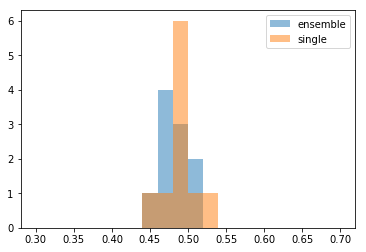

In [5]:
plt.hist(fsel_ensemble,range=(0.3,0.7),bins=20,alpha=0.5,label='ensemble')
plt.hist(fsel_single,range=(0.3,0.7),bins=20,alpha=0.5,label='single')
print(np.std(fsel_ensemble))
print(np.std(fsel_single))
plt.legend()
plt.show()

In [6]:
N = 10
samps = len(bkg)/N
print(samps)
fsel_ensemble = []
fsel_single = []
for i in range(N):
    bkg_subset = bkg.sample(n=samps,random_state=i)
    fsel_ensemble.append(len(bkg_subset.query('sigprobavg>0.1'))/float(samps))
    fsel_single.append(len(bkg_subset.query('sigprob0>0.1'))/float(samps))


638


0.014593646519127713
0.014471932063181338


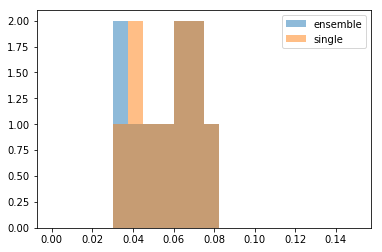

In [7]:
plt.hist(fsel_ensemble,range=(0.0,0.15),bins=20,alpha=0.5,label='ensemble')
plt.hist(fsel_single,range=(0.0,0.15),bins=20,alpha=0.5,label='single')
print(np.std(fsel_ensemble))
print(np.std(fsel_single))
plt.legend()
plt.show()

In [9]:
from __future__ import print_function
cutMode=0
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['data','dirt','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['data','dirt','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['data','dirt','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if 'lowE' in filetag: continue
        print('Sample:',filetag)
        if filetag=='data':
            pstring = 'SelectionMode%i_%s_fset12_run%i.parquet.gzip'%(cutMode,filetag,r)
        else:
            pstring = 'SelectionMode%i_%s_fset12_run%i.parquet.gzip'%(cutMode,filetag,r)
        try:
            df[r][filetag] = pd.read_parquet(psavedir+pstring)
            print(len(df[r][filetag]))
        except:
            print('No Events')
            pass
        
df[2]['ext'] = df[3]['ext'].copy()

df1d = (df[1]['data'].copy()).query('run<8000')
df2d = (df[1]['data'].copy()).query('run>8000 and run<13697')
df3d = (df[1]['data'].copy()).query('run>13696')
df[1]['data'] = df1d
df[2]['data'] = df2d
df[3]['data'] = df3d



 #################### RUN 1 #################### 

Sample: data
5462
Sample: dirt
No Events
Sample: ext
263
Sample: overlay
5602
Sample: intrinsics
14733
Sample: ncpi0
589
Sample: ccpi0
285


 #################### RUN 2 #################### 

Sample: data
No Events
Sample: dirt
No Events
Sample: ext
No Events
Sample: overlay
5784
Sample: intrinsics
11241


 #################### RUN 3 #################### 

Sample: data
No Events
Sample: dirt
63
Sample: ext
537
Sample: overlay
3943
Sample: intrinsics
5940
Sample: ncpi0
504
Sample: ccpi0
266


In [10]:
#ROC curve

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}

cuts = 'Enu_1e1p<1200 and Enu_1e1p>200'
dftot = pd.DataFrame()
for r in [1,2,3]:
    for filetag in df[r].keys():
        if filetag=='data': continue
        dfc = df[r][filetag].copy().query(cuts)
        MakeAvgBDTcut(dfc,0.0,20,(r==2 and filetag=='overlay'),ttc=0.1)
        weights = dfc['GenieWeight'] * dfc['POTweight']**(-1) * POTdict[r][filetag]
        weights_single = weights
        dfc['weights'] = weights
        dftot = pd.concat((dftot,dfc))
        
        